Descriptor Calculation
>A variety of descriptors are available within the RDKit. The complete list is provided in List of Available Descriptors.

>Most of the descriptors are straightforward to use from Python via the centralized rdkit.Chem.Descriptors module

In [7]:
from rdkit.Chem import Descriptors
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas

In [2]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
Descriptors.TPSA(m)

37.3

In [3]:
Descriptors.MolLogP(m)

1.3848

Calculating All Descriptors
>The rdkit.Chem.Descriptors module provides a convenience function, CalcMolDescriptors(), to calculate all available descriptors for a molecule. CalcMolDescriptors() returns a dictionary with descriptor names as the keys and descriptor values as the values

In [4]:
vals = Descriptors.CalcMolDescriptors(m)
vals['TPSA']

[16:34:51] DEPRECATION WARNING: please use MorganGenerator
[16:34:51] DEPRECATION WARNING: please use MorganGenerator
[16:34:51] DEPRECATION WARNING: please use MorganGenerator


37.3

In [5]:
vals['NumHDonors']

1

CalcMolDescriptors() makes it easy to generate descriptors for a set of molecules and get the values into a pandas DataFrame

In [8]:
mols = [Chem.MolFromSmiles('c1ccccc1C(=O)O'),Chem.MolFromSmiles('COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C')]

descrs = [Descriptors.CalcMolDescriptors(mol) for mol in mols]
df = pandas.DataFrame(descrs)
df.head()
df.head(3)

[16:35:19] DEPRECATION WARNING: please use MorganGenerator
[16:35:19] DEPRECATION WARNING: please use MorganGenerator
[16:35:19] DEPRECATION WARNING: please use MorganGenerator
[16:35:19] DEPRECATION WARNING: please use MorganGenerator
[16:35:19] DEPRECATION WARNING: please use MorganGenerator
[16:35:19] DEPRECATION WARNING: please use MorganGenerator


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.200926,10.200926,0.331019,-0.879074,0.610604,8.888889,122.123,116.075,122.036779,46,...,0,0,0,0,0,0,0,0,0,0
1,12.680258,12.680258,0.277212,-1.328285,0.769239,12.333333,345.424,326.272,345.114712,126,...,0,0,0,0,0,0,0,0,0,0


Calculating Partial Charges
Partial charges are handled a bit differently:

In [14]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
AllChem.ComputeGasteigerCharges(m)
m.GetAtomWithIdx(0).GetDoubleProp('_GasteigerCharge')

-0.04769375004654255

Visualization of Descriptors
Similarity maps can be used to visualize descriptors that can be divided into atomic contributions.

The Gasteiger partial charges can be visualized as (using a different color scheme):

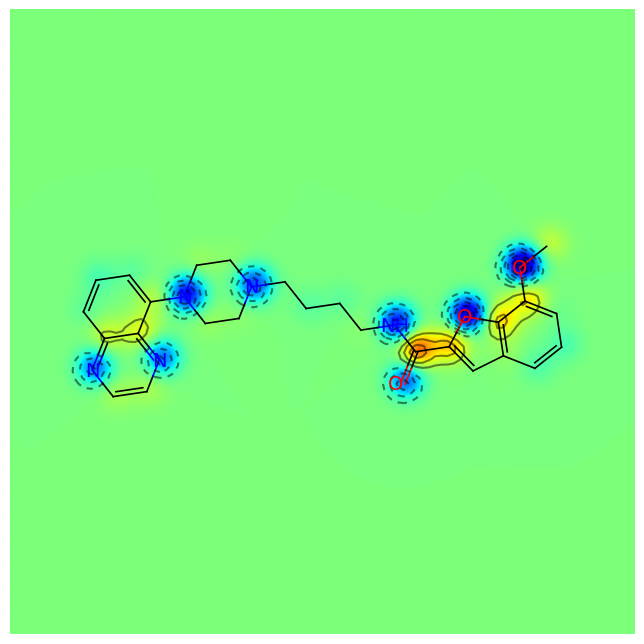

In [15]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

Or for the Crippen contributions to logP:

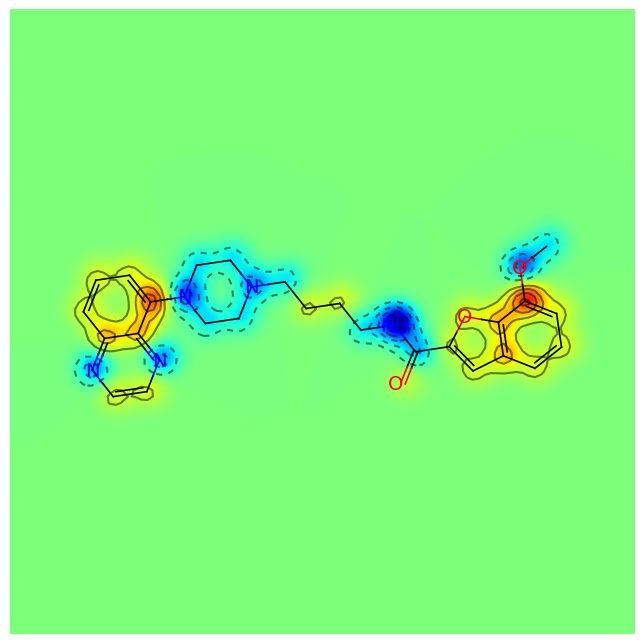

In [16]:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], colorMap='jet', contourLines=10)